## 1. 투표기반 분류기

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [41]:
X, y = make_moons(n_samples = 1000, noise=0.3, random_state=42)

In [5]:
X.shape, y.shape

((500, 2), (500,))

In [7]:
X[:, 0]
X[:, 1]

array([-0.25874875,  0.92038714, -0.45552558,  1.08628844,  1.50942444,
       -0.55117606, -0.15862989,  1.31817168,  0.49607493, -0.45980435,
       -0.01569994,  0.25219294, -0.7164187 ,  0.62486933, -0.51105069,
       -0.54069686,  0.29779005,  0.5179118 , -0.80209911, -0.25361127,
        0.22237528,  0.46793015,  0.23938905, -0.21552359,  0.41594634,
        1.01491329,  0.22194847,  0.42392467,  1.56378251, -0.37654889,
       -0.03961892, -0.30353056, -0.05615094,  0.84336766,  0.38027569,
       -0.77306105, -0.38304892,  0.84400584,  0.62105408,  0.96162325,
       -0.77914243,  0.81659756,  0.5738688 ,  0.15981211, -0.04316216,
        0.96722336,  0.16080796,  0.47834272, -0.79825322,  0.260445  ,
        1.13134609,  0.92791687,  1.08219171, -0.33619758,  0.48235382,
        1.09730924,  1.01921527,  0.15470144,  0.39039385,  1.30952481,
        0.174434  ,  0.11781406, -0.31106856, -0.18068443,  1.04359771,
        0.66710754, -0.02393825,  0.60521267,  0.00411171, -0.48

Text(0, 0.5, 'X2')

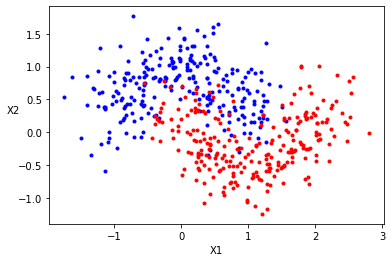

In [21]:
# 정답 y의 경우 0 또는 1로 구성되어 있음
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'b.') # 정답이 0인경우 blue
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r.') # 정답이 1인경우 red
plt.xlabel('X1')
plt.ylabel('X2', rotation=0) #rotation 넣으면 X2 라벨 회전

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 1.1 하드보팅

In [53]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
                estimators=[('lr', log_clf), ('rf', rnd_clf), ('svm', svm_clf)],
                voting='hard'
            )

In [27]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svm', SVC())])

In [47]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


In [28]:
y_pred = voting_clf.predict(X_test)

In [30]:
(y_test == y_pred).sum(), len(y_test)

(112, 125)

In [34]:

accuracy_score(y_test, y_pred)

0.896

### 1.2 소프트보팅

In [58]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(gamma='auto', probability=True)

voting_clf = VotingClassifier(
                estimators=[('lr', log_clf), ('rf', rnd_clf), ('svm', svm_clf)],
                voting='soft'
            )

In [59]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.904
SVC 0.888
VotingClassifier 0.912


## 2. 배깅 앙상블

In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [63]:
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(random_state=42), n_estimators=500,
            max_samples=100, bootstrap=True, random_state=42, n_jobs=-1
        )

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=42)

In [64]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

In [65]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.856

### oob 평가

In [66]:
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(random_state=42), n_estimators=500,
            max_samples=100, bootstrap=True, oob_score=True, random_state=42, n_jobs=-1
        )

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [67]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

In [68]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.856

In [69]:
bag_clf.oob_score_

0.9253333333333333

### 랜덤포레스트 모델

In [72]:
# 결정트리를 기반으로 만들어진 앙상블 모델, 스케일링 불필요, 특성의 중요도 알 수 있음
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(max_leaf_nodes=16, random_state=42), 
            n_estimators=500, bootstrap=True, oob_score=True, random_state=42, n_jobs=-1
        )
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [73]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [74]:
rnd_clf.feature_importances_

array([0.42253629, 0.57746371])

In [ ]:
# x2 특성이 57% 정도로 x1 특성의 42% 에 비해 더 중요했다.